In [16]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

###  valcano

In [17]:
diff = read.table('./sample35.pro.txt',header =T,sep = '\t',fill =NA)

In [18]:
diff = diff[!duplicated(diff$GeneName),]

In [19]:
head(diff,3)

,GeneName,Biotype,Gene,CI_normalize,CTRL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,TSPAN6,protein_coding,ENSG00000000003,3.138762,2.73203,1.148876,0.2002226,0.528271948,0.97927424,up,no
2,DPM1,protein_coding,ENSG00000000419,251.215222,179.06798,1.402904,0.4884165,0.000996971,0.05675136,up,no
3,SCYL3,protein_coding,ENSG00000000457,636.992180,544.75311,1.169323,0.2256731,0.109199545,0.62888501,up,no


In [20]:
padj = 0.05
foldChange = 0.5

In [21]:
diff$group = as.factor(ifelse(diff$padj	 < padj & abs(diff$Log2FoldChange	) > foldChange, 
                                 ifelse(diff$Log2FoldChange	> foldChange ,'Up(232)','Down(150)'),'NoSignifi(16803)'))
table(diff$group)


       Down(150) NoSignifi(16803)          Up(232) 
             150            16803              232 

In [22]:
res = na.omit(diff)

In [23]:
write.csv(res,file = './fig2/sample35.diffgene.csv')

In [24]:
library(dplyr)

In [25]:
    top_5 <-
          res %>%
            filter(GeneName  %in% c('FAM200B','BCL2A1','IGJ','TXN')   ) 

In [26]:
rownames(top_5) = top_5$GeneName

In [27]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

In [30]:
 p = ggplot(data=res,aes(x=Log2FoldChange,y=-log10(padj)))+
    geom_point(aes(color=group),size=1)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.5,.5),linetype="dashed",color="grey30")+
   # geom_text_repel(data=top_5,aes(x= Log2FoldChange,y= -log10(padj),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

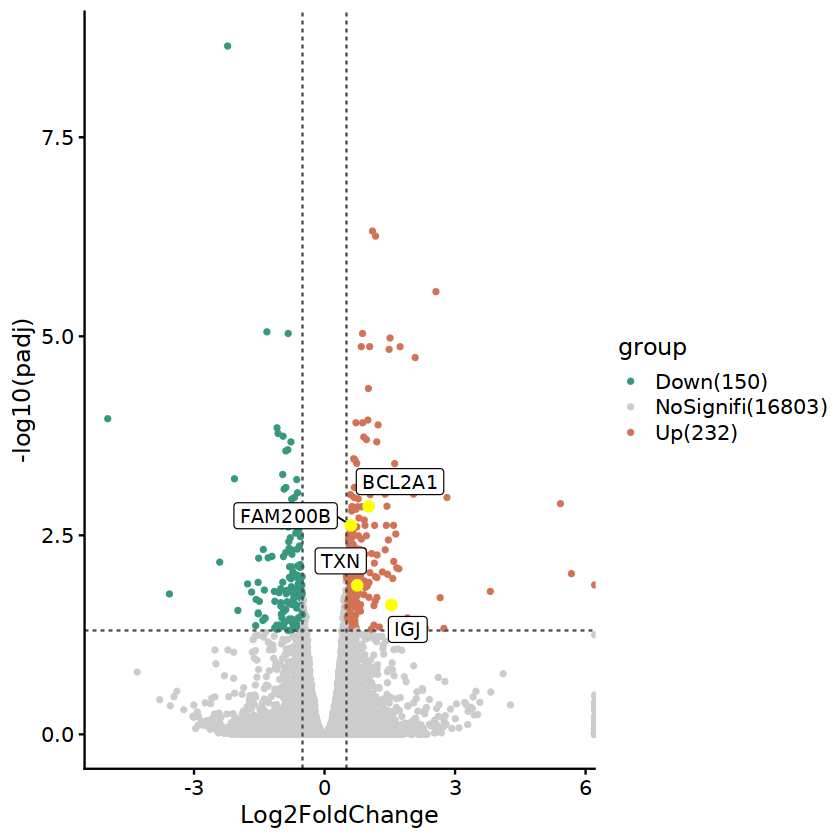

In [31]:
library(ggrepel)
p + geom_label_repel(data = top_5, 
                     aes(x = Log2FoldChange, y = -log10(padj), label = rownames(top_5)),
                     size = 4,color="black",
                     box.padding = unit(0.4, "lines"), 
                     segment.color = "black",   #连线的颜色
                     segment.size = 0.4,  #连线的粗细
                     )+
  #突出表示差异基因
  geom_point(data=top_5,aes(x = Log2FoldChange, y = -log10(padj)),colour="yellow",size=2.5)

In [32]:
ggsave('./fig2/Figure1.35sample.valano.pdf',width =5,height = 4)

In [14]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [15]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  dplyr::select(GeneName)

In [16]:
gene_symbol <- bitr(geneID = jiaoji$GeneName,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 2,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji$GeneName, fromType = "SYMBOL", toType = c("ENTREZID"), :
"11.52% of input gene IDs are fail to map..."


In [17]:
grep('im',BP@result$Description,value = T)

[1] "positive regulation of response to external stimulus"

In [18]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(5) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf

In [19]:
go = rbind(bp,cc,mf)

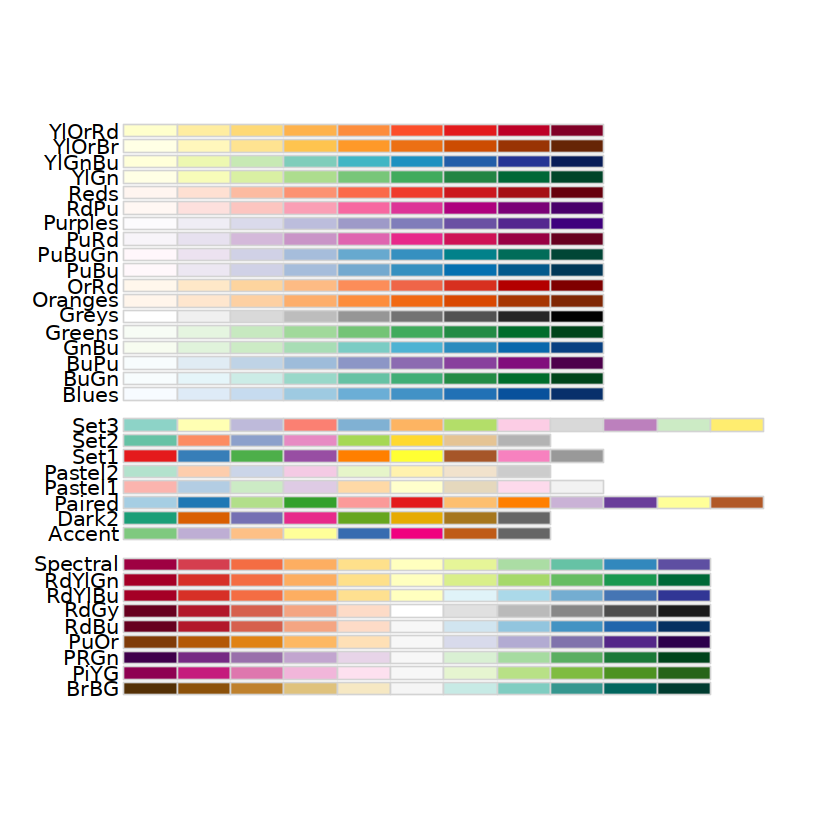

In [20]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=5)
go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."
Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
i Please use the `legend.position.inside` argument of `theme()` instead."


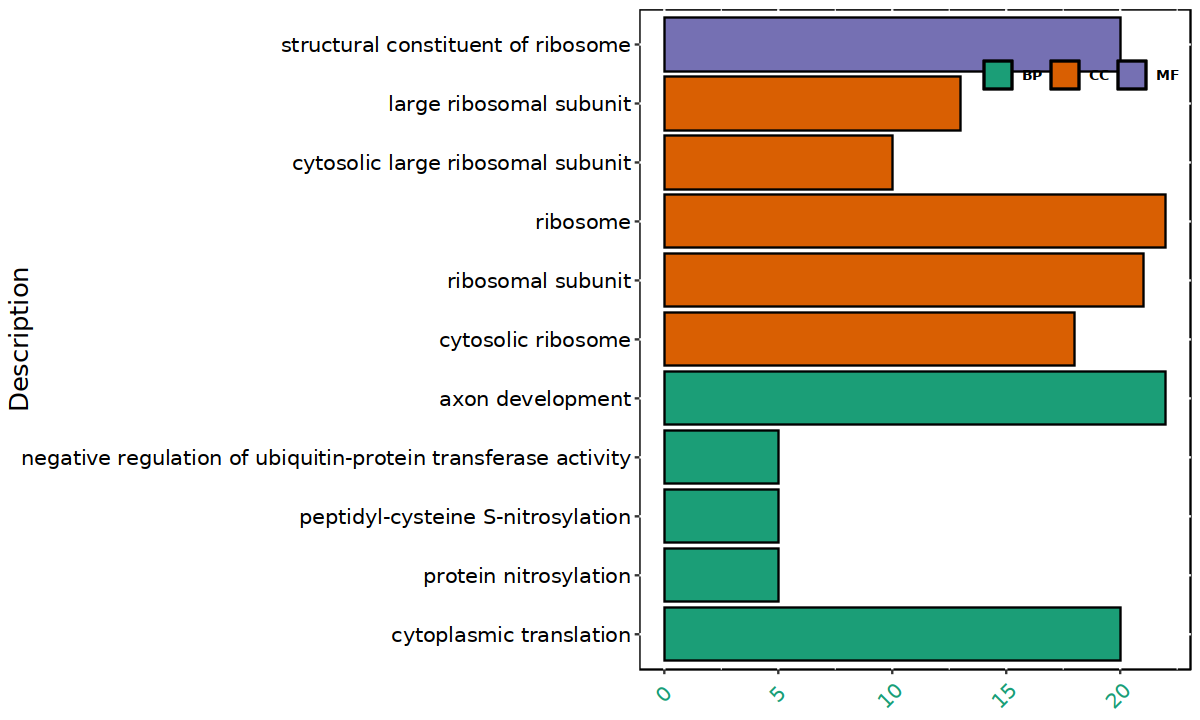

In [21]:
options(repr.plot.width = 10,repr.plot.height = 6)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip() + 
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )


In [22]:
ggsave('./fig2/Figure1.35sample.GO.pdf',width = 10,height = 8)

In [23]:
write.csv(BP@result,file = './fig2/35sample.GO.csv')

In [24]:
head(diff,2)

,GeneName,Biotype,Gene,CI_normalize,CTRL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,TSPAN6,protein_coding,ENSG00000000003,3.138762,2.73203,1.148876,0.2002226,0.528271948,0.97927424,up,no,NoSignifi
2,DPM1,protein_coding,ENSG00000000419,251.215222,179.06798,1.402904,0.4884165,0.000996971,0.05675136,up,no,NoSignifi


In [25]:
library(fgsea)
library(tidyverse)
library(org.Hs.eg.db)
library(msigdbr)

Gene = diff[,c('GeneName','Log2FoldChange')]


# 
entrez_id<-bitr(geneID = Gene$GeneName,fromType = "SYMBOL",toType = "ENTREZID",OrgDb = org.Hs.eg.db)
colnames(entrez_id)<-c("GeneName","ENTREZID")
# 
entrez_gene<-merge(entrez_id,Gene,by="GeneName") %>% na.omit()

entrez_gene <- entrez_gene[is.finite(entrez_gene$Log2FoldChange),]
###### 
# 
rank_df<-entrez_gene$Log2FoldChange
names(rank_df)<-entrez_gene$GeneName
rank_df<-sort(rank_df,decreasing = TRUE)

geneset <- qusage::read.gmt("/data/import/project1/kegg.gmt")

# 
fgseaRes <- fgsea(pathways = geneset, 
                  stats = rank_df,
                  minSize=5,
                  maxSize=500,
                  nperm=100000)
head(fgseaRes[order(pval), ])
df_fgseaRes = data.frame(lapply(fgseaRes, as.character), stringsAsFactors=FALSE)
write.table(df_fgseaRes,file = "./fig.re/sample35.fgseaRes.txt",sep="\t",quote = FALSE,row.names = FALSE)

Warning message:
"package 'fgsea' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.2.1     v purrr   1.0.2
v tidyr   1.3.1     v stringr 1.5.1
v readr   2.1.5     v forcats 1.0.0
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x BiocGenerics::Position()  masks ggplot2::Position(), base::Position()
x IRanges::collapse()       masks dplyr::collapse()
x Biobase::combine()        masks BiocGenerics::combine(), dplyr::combine()
x IRanges::desc()           masks dplyr::desc()
x tidyr::expand()           masks S4Vectors::expand()
x clusterProfiler::filter() masks dplyr::filter(), stats::filter()
x S4Vectors::first()        masks dplyr::first()
x dply

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
Herpes simplex virus 1 infection,1.939789e-05,0.002302400,0.4425969,1.903588,0,475,"ZNF208, ...."
Ribosome,1.977379e-05,0.002302400,0.6127219,2.280531,0,130,"RPS4Y2, ...."
Cytoskeleton in muscle cells,2.031529e-05,0.002302400,-0.5231537,-2.068565,0,196,"MYH14, M...."
Olfactory transduction,8.099297e-05,0.006884403,-0.4826850,-1.800655,3,126,"OR2G3, O...."
Coronavirus disease - COVID-19,1.179523e-04,0.008020760,0.4316480,1.702280,5,201,"RPS4Y2, ...."
ECM-receptor interaction,1.232896e-03,0.059133547,-0.5098740,-1.743708,60,73,"ITGA11, ...."


In [26]:
options(repr.plot.width = 16,repr.plot.height = 9)

In [27]:
dim(fgseaRes)

[1] 340   8

png 
  2

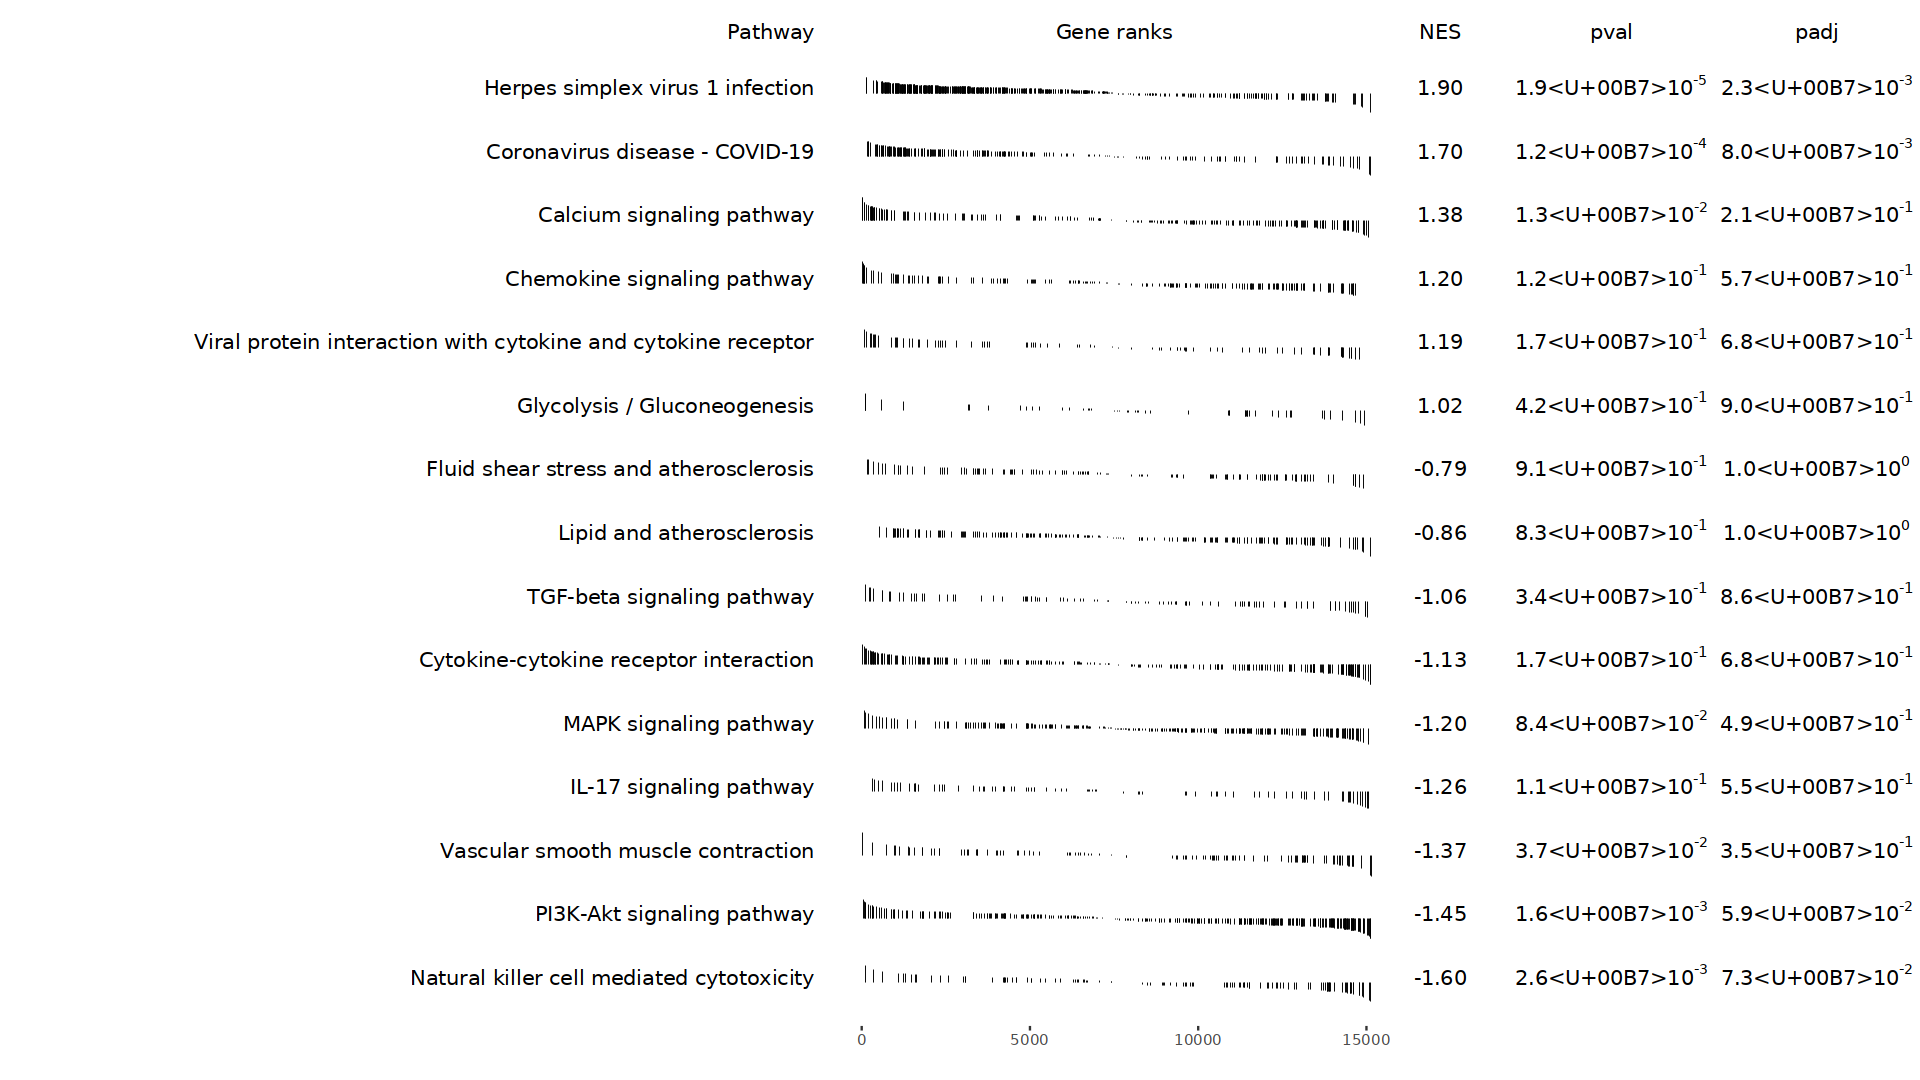

In [31]:
sig <- fgseaRes
sig <- sig[order(sig$NES,decreasing = T),]

options(repr.plot.width = 16,repr.plot.height = 9)

path = c('Herpes simplex virus 1 infection',
'Coronavirus disease - COVID-19',
'Calcium signaling pathway',
'Chemokine signaling pathway',
'Viral protein interaction with cytokine and cytokine receptor',
'Glycolysis / Gluconeogenesis',
'MAPK signaling pathway',
'TGF-beta signaling pathway',
'PI3K-Akt signaling pathway',
'Cytokine-cytokine receptor interaction',
'Natural killer cell mediated cytotoxicity',
'IL-17 signaling pathway',
'Vascular smooth muscle contraction',
'Lipid and atherosclerosis',
'Fluid shear stress and atherosclerosis'
)


sig1 = sig %>% filter(pathway %in% path)

plotGseaTable(geneset[sig1$pathway], rank_df,  fgseaRes, gseaParam=0.5)

pdf('./fig.re/sample.fgsea35.pdf',width = 16,height = 6)
plotGseaTable(geneset[sig1$pathway], rank_df,  fgseaRes, gseaParam=0.5)
dev.off()

In [96]:
 diff <- diff[!is.infinite(diff$Log2FoldChange),] %>% na.omit()

diffgene = diff 

In [98]:


library(clusterProfiler)
library(enrichplot)
library(org.Mm.eg.db)
#
diffgene$gene <-diffgene$GeneName
ids=bitr(diffgene$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')
#
diffgene=merge(diffgene,ids,by.x='gene',by.y='SYMBOL')

head(diffgene)

cluster3.markers = diffgene

#
cluster3.markers <- cluster3.markers[order(cluster3.markers$Log2FoldChange,decreasing = T),]
#
cluster3.markers_list <- as.numeric(cluster3.markers$Log2FoldChange)
names(cluster3.markers_list) <- cluster3.markers$ENTREZID
head(cluster3.markers_list)

#
cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0.15]
head(cluster3_de)

length(cluster3_de)



'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diffgene$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"9.58% of input gene IDs are fail to map..."


,gene,GeneName,Biotype,Gene,CI_normalize,CTRL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group,ENTREZID
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
1,A1BG,A1BG,protein_coding,ENSG00000121410,15.26858235,11.99397771,1.2730207,0.34825592,0.1187657,0.651324312,up,no,NoSignifi,1
2,A1CF,A1CF,protein_coding,ENSG00000148584,0.04271579,0.05761938,0.7413441,-0.43178479,1.0000000,1.000000000,down,no,NoSignifi,29974
3,A2M,A2M,protein_coding,ENSG00000175899,4.79824405,3.50475419,1.3690672,0.45319328,0.4610963,0.967059029,up,no,NoSignifi,2
4,A2ML1,A2ML1,protein_coding,ENSG00000166535,0.10179802,0.10729120,0.9488012,-0.07582232,1.0000000,1.000000000,down,no,NoSignifi,144568
5,A3GALT2,A3GALT2,protein_coding,ENSG00000184389,21.35772896,21.15474463,1.0095952,0.01377698,1.0000000,1.000000000,up,no,NoSignifi,127550
6,A4GALT,A4GALT,protein_coding,ENSG00000128274,1.06615274,5.66281007,0.1882727,-2.40910401,0.0000341,0.006867687,down,yes,Down,53947


9796     1630    23213     7026   388121    23551 
5.674499 5.421555 4.271404 4.106123 3.820690 3.811147

[1] "9796"   "1630"   "23213"  "7026"   "388121" "23551"

[1] 9161

In [99]:
cluster3_gsekg <- gseKEGG(cluster3.markers_list,organism = "hsa",pvalueCutoff = 1)
#
cluster3_gsekg_arrange <- arrange(cluster3_gsekg,desc(abs(NES)))

head(cluster3_gsekg_arrange,2)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.13% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa03010,hsa03010,Ribosome,131,0.6111633,2.310315,1.000000e-10,3.470000e-08,3.231579e-08,4778,"tags=73%, list=32%, signal=50%",140032/6164/9349/6189/6234/6129/6144/6201/6170/6235/6229/6230/6233/11224/64983/6222/6232/6156/6227/6155/51187/6128/51065/51121/6152/6165/6205/6157/6224/6160/6218/6194/6202/200916/11222/6167/28998/6207/6135/6228/9553/6169/65008/6125/6147/6150/25873/9045/63931/6161/2197/6133/6168/29093/6206/6217/51023/6208/3921/6136/6146/64981/55173/51318/6124/6154/6138/6166/6171/6192/4736/6209/6187/6143/6191/6132/51264/64928/6137/29088/6193/6173/6159/6134/6188/6223/64960/9801/23521/64963/51081/6142/63875/65003/6158
hsa04820,hsa04820,Cytoskeleton in muscle cells,196,-0.5231537,-2.065398,3.755458e-09,6.515719e-07,6.068029e-07,2756,"tags=45%, list=18%, signal=37%",1291/5339/23224/7169/64423/4634/825/83660/6442/6385/2023/832/4628/3678/1832/752/10398/476/287/1289/7791/9124/2199/6711/1829/4635/60/4629/23345/8515/4703/25777/1466/2274/23500/3695/3339/7111/477/482/51332/5318/271/3680/6709/1293/3908/1292/480/3673/1634/1729/3691/7094/88/4627/7414/4000/1302/1277/478/1674/6444/2273/22795/7139/72/4811/7057/256076/3693/25802/3690/129446/1284/9172/3674/127294/3696/84467/2006/2335/2318/8572/2192/22801/51778/79784


In [100]:
grep('Na',cluster3_gsekg_arrange@result$Description)

[1] 10

In [101]:
cluster3_gsekg_arrange@result[10,]

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa04650,hsa04650,Natural killer cell mediated cytotoxicity,109,-0.4477098,-1.642159,0.002090582,0.07484838,0.0697056,1491,"tags=24%, list=10%, signal=22%",80329/4773/3823/7535/3107/3683/27040/22914/3822/919/3824/259197/80328/3805/3812/1437/3002/9437/117157/3442/5551/3804/3802/3811/9436/3456


In [102]:
write.csv(cluster3_gsekg_arrange,file = './fig.re//sample35.KEGG_GSEA.csv')

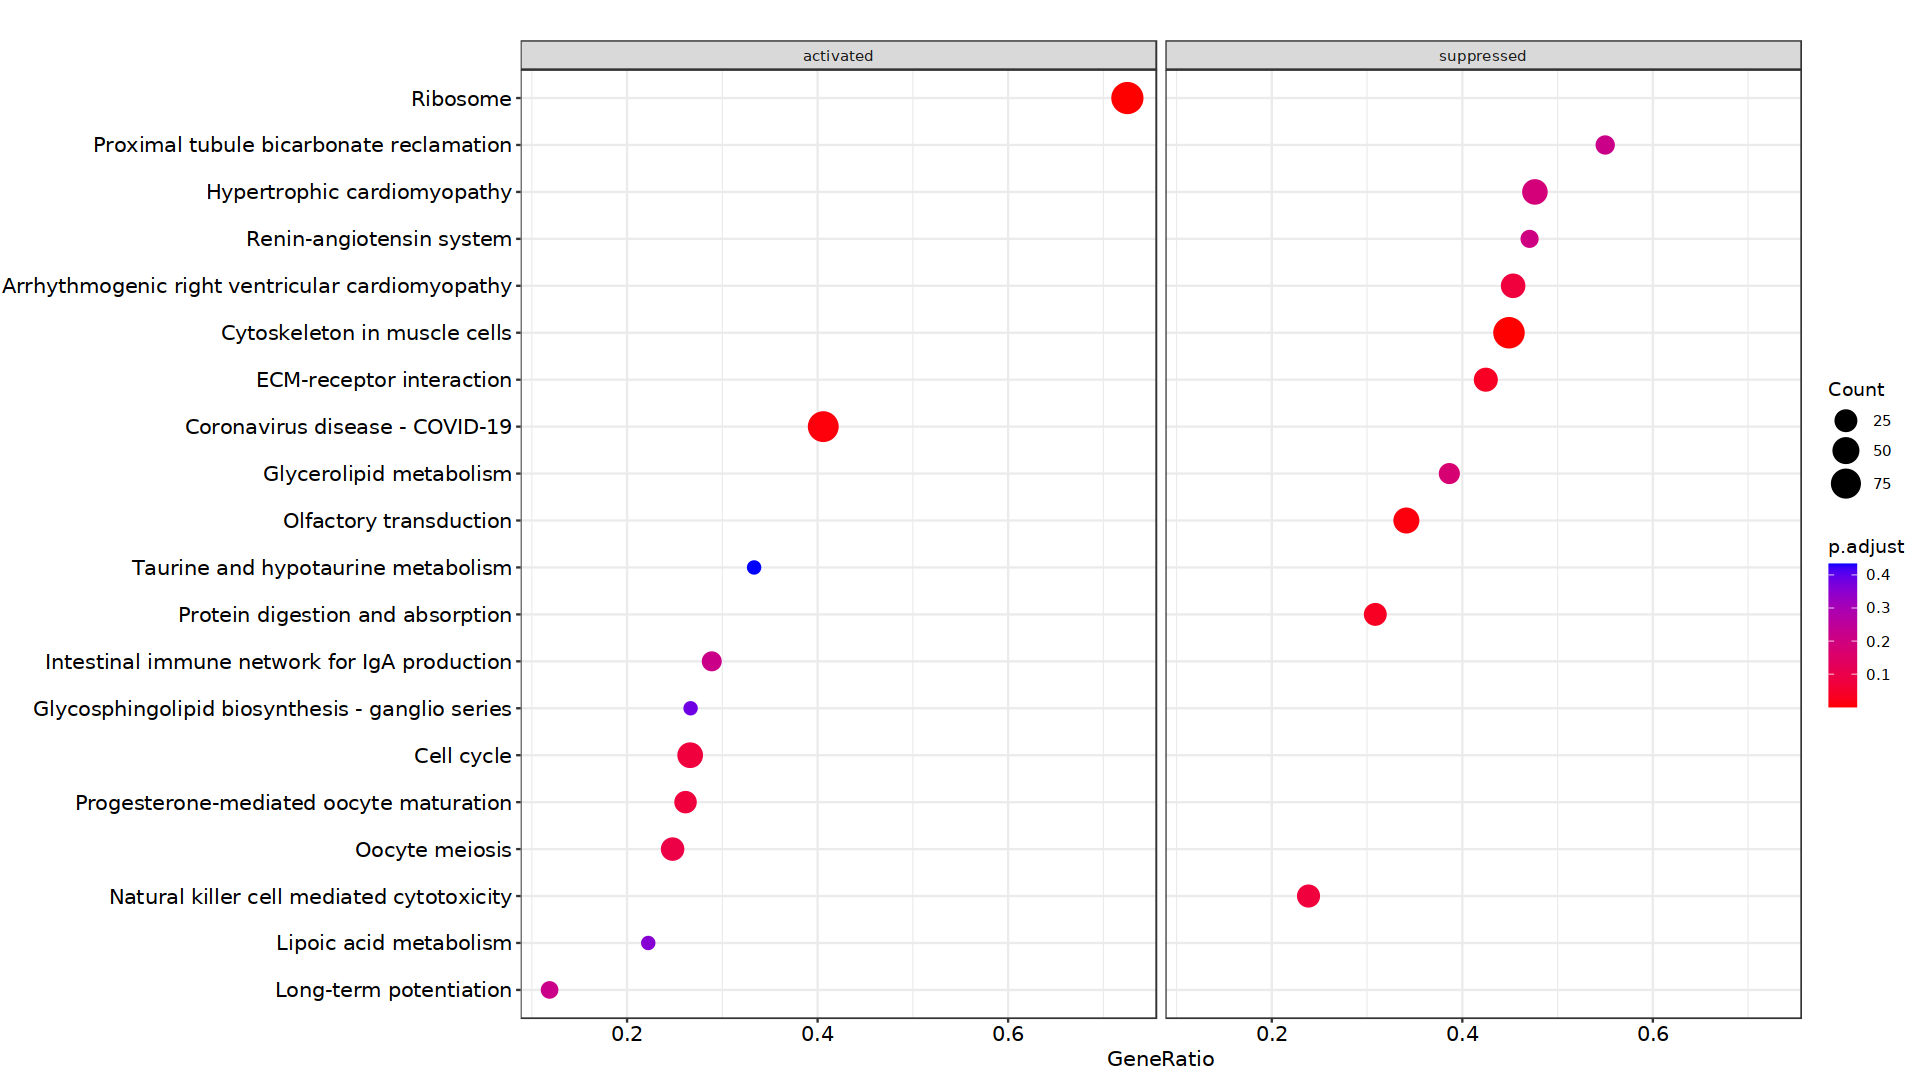

In [104]:
dotplot(
  cluster3_gsekg_arrange,label_format = 100,
  showCategory=10,
  split=".sign") + facet_grid(.~.sign)
ggsave('./fig.re/sample35.gsea.pdf',width = 11,height = 9)